In [2]:
import numpy as np
import pandas as pd

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('housing.csv')

In [3]:
df.head(
)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

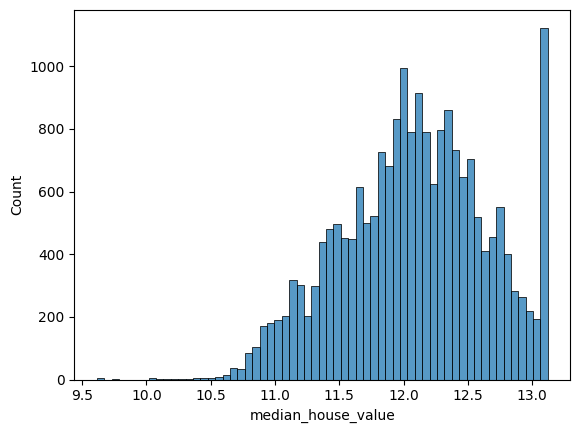

In [13]:
sns.histplot(np.log1p(df['median_house_value']))

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

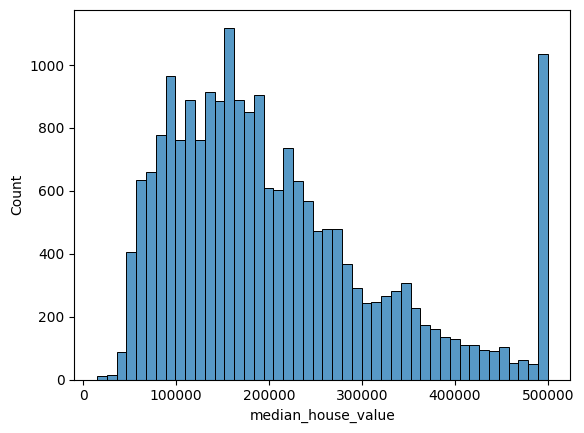

In [14]:
sns.histplot(df['median_house_value'])

In [6]:
cols = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
]

In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df.population.median()

1166.0

In [45]:
target = 'median_house_value'

n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df.iloc[idx[n_train:n_train + n_val]].reset_index(drop=True)
df_test = df.iloc[idx[n_train + n_val:]].reset_index(drop=True)

y_train = np.log1p(df_train[target].values)
y_val = np.log1p(df_val[target].values)
y_test = np.log1p(df_test[target].values)

del df_train[target]
del df_val[target]
del df_test[target]

In [20]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [21]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [56]:
X_train = df_train[cols].fillna(0).values
X_val = df_val[cols].values

In [49]:
w0, w = train_linear_regression(X_train, y_train)


In [50]:
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.3295330365228028

In [52]:
X_train = df_train.fillna(df_train['total_bedrooms'].mean())

In [ ]:
w0, w = train_linear_regression(X_train, y_train)

In [53]:
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.3295330365228028

In [54]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [55]:
r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [62]:
for r_value in r:
    w0, w = train_linear_regression_reg(X_train, y_train, r_value)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(f'r: {r_value}, w0: {w0:.2f}, rmse: {score:.5f}')

r: 0, w0: -11.69, rmse: 0.32953
r: 1e-06, w0: -11.69, rmse: 0.32953
r: 0.0001, w0: -11.69, rmse: 0.32953
r: 0.001, w0: -11.67, rmse: 0.32953
r: 0.01, w0: -11.53, rmse: 0.32953
r: 0.1, w0: -10.27, rmse: 0.32969
r: 1, w0: -4.92, rmse: 0.33379
r: 5, w0: -1.48, rmse: 0.33925
r: 10, w0: -0.79, rmse: 0.34061


In [64]:
w0, w = train_linear_regression_reg(np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)), 0.001)

In [66]:
X_test = df_test[cols].values

In [67]:
y_pred = w0 + X_test.dot(w)

In [68]:
rmse(y_test, y_pred)

0.3514712807108186

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [40]:
X = df[cols].fillna(0)
y = np.log1p(df['median_house_value'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
lr = LinearRegression()

In [41]:
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
from sklearn.metrics import mean_squared_error

In [42]:
y_pred = lr.predict(X_test)

In [43]:
mean_squared_error(y_test, y_pred, squared=False)

0.3470108431796718

In [19]:
from sklearn.linear_model import Ridge

In [24]:
ridge = Ridge(alpha=0.001)

In [33]:
ridge.fit(X_train, y_train)

Ridge(alpha=0.001)

In [34]:
y_pred = ridge.predict(X_test)

In [35]:
mean_squared_error(y_test, y_pred, squared=False)

0.3546389018221049